<a href="https://colab.research.google.com/github/EdgarAgOr/FAP_Cheminformatic_PET/blob/main/9_MACSS_ECFP_Binding_site_CHEMBL_Mol_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Instalar rdkit
      !pip -q install rdkit.pypi==2021.9.4
      pbar.update(20)
      # Instalar Pillow
      !pip -q install Pillow
      pbar.update(40)
      # Instalar molplotly
      !pip install molplotly
      pbar.update(60)
      # Instalar jupyter-dash
      !pip install jupyter-dash
      pbar.update(80)
      # Instalar el diseño de aplicación dash
      !pip install dash-bootstrap-components
      pbar.update(100)

In [ ]:
#Import libraries
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [ ]:
FAP_CHEM = pd.read_csv('/content/Bioactividad_FAPCHEMBl_curada_data.csv')
FAP_CHEM.head()

,molecule_chemblid,canonical_smiles,bioactivity_class,standard_value,Data Set,Smiles standarization
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,Active,650.0,CHEMBl,Nope
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,Active,290.0,CHEMBl,Nope
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O,Active,530.0,CHEMBl,Nope
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCC[C@@H]1B(O)O,Active,4.6,CHEMBl,Nope
4,CHEMBL372180,CCCCCC12CCC(NCC(=O)N3CCC[C@H]3B(O)O)(CC1)CC2,Active,270.0,CHEMBl,Nope


In [ ]:
FAP_BS= pd.read_csv("/content/Bioactividad_FAPBSITE_curada_activos_data.csv")

FAP_BS.head(2)

,BindingDB_id,Smiles,bioactivity_class,IC50_nM,Data Set,Smiles standarization
0,1297087,CC(C)[C@H](C(N[C@@H](C)C(N1[C@@H](B(O)O)CCC1)=...,Active,62.0,Bsite,Nope
1,1297088,OB(O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](NC(=O...,Active,26.2,Bsite,Nope


In [ ]:
FAP_Mol= pd.read_csv("/content/FAP_Radiofarmacos_curada_data.csv")

FAP_Mol.head(2)

,Compuesto,SMILES,pEC50,Data Set,bioactivity_class
0,TriOncoFAP-DOTAGA,[3H][C@]1(C#N)CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2c(...,10.886057,Molecules,Active
1,P-FAPI,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(OC...,10.136677,Molecules,Active


In [ ]:
print(FAP_CHEM.columns)
print(FAP_BS.columns)
print(FAP_Mol.columns)

Index(['molecule_chemblid', 'canonical_smiles', 'bioactivity_class',
       'standard_value', 'Data Set', 'Smiles standarization'],
      dtype='object')
Index(['BindingDB_id', 'Smiles', 'bioactivity_class', 'IC50_nM', 'Data Set',
       'Smiles standarization'],
      dtype='object')
Index(['Compuesto', 'SMILES', 'pEC50', 'Data Set', 'bioactivity_class'], dtype='object')


In [ ]:
FAP_CHEM = FAP_CHEM[['molecule_chemblid', 'canonical_smiles','Data Set']]

FAP_BS= FAP_BS[['BindingDB_id', 'Smiles', 'Data Set']]

FAP_Mol= FAP_Mol[['Compuesto', 'SMILES', 'Data Set']]

In [ ]:
FAP_CHEM.columns = ["ID", "SMILES", "Data Set"]

FAP_BS.columns = ['ID', 'SMILES', 'Data Set']

FAP_Mol.columns = ['ID', 'SMILES', 'Data Set']

In [ ]:
 DATA = pd.concat([FAP_CHEM, FAP_BS, FAP_Mol], axis=0).reset_index(drop=True)

 DATA


,ID,SMILES,Data Set
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCC[C@@H]1B(O)O,CHEMBl
4,CHEMBL372180,CCCCCC12CCC(NCC(=O)N3CCC[C@H]3B(O)O)(CC1)CC2,CHEMBl
...,...,...,...
1064,FAPI-55,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(cc...,Molecules
1065,18FFEQGP,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(OCC[18F])...,Molecules
1066,FluoFAPI,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(F)cc21,Molecules
1067,HBED-CC-FAPI-04,O=C(NCC(=O)N1CC(F)(F)C[C@H]1C#N)c1ccnc2ccc(OCC...,Molecules


# MACCS

In [ ]:
df_MACCS_Keys=pd.DataFrame([[int(y) for y in MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)).ToBitString()] for x in DATA["SMILES"]])

In [ ]:
df_MACCS_Keys.head(2)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0


In [ ]:
df_MACCS_Keys.to_csv('MACCS.csv', index = True)

In [ ]:
#Compute tSNE from MACCS Keys fingerprint, perplexity: 30, 5000 iterations
data_tsne_30 = df_MACCS_Keys.copy()
data_tsne_30 = StandardScaler().fit_transform(data_tsne_30)
tsne_30 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000)
tsne_results_30 = tsne_30.fit_transform(data_tsne_30)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1069 samples in 0.002s...
[t-SNE] Computed neighbors for 1069 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1069
[t-SNE] Computed conditional probabilities for sample 1069 / 1069
[t-SNE] Mean sigma: 3.863281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.495434
[t-SNE] KL divergence after 5000 iterations: 0.304736


In [ ]:
#Concatenate numpy arrays: label and tSNE results MACCS
label = DATA[["ID", 'SMILES', 'Data Set']]
label = label.to_numpy()
arr = np.concatenate((label, tsne_results_30), axis = 1)

In [ ]:
#Create a new dataframe MACCS
tsne_dataset_30 = pd.DataFrame(data=arr, columns=["ID", 'SMILES', 'Data Set', 'Component1', 'Component2'] )
tsne_dataset_30

,ID,SMILES,Data Set,Component1,Component2
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,CHEMBl,10.705457,79.134987
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl,9.076259,82.412636
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl,8.611887,80.380981
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCC[C@@H]1B(O)O,CHEMBl,8.179998,75.930099
4,CHEMBL372180,CCCCCC12CCC(NCC(=O)N3CCC[C@H]3B(O)O)(CC1)CC2,CHEMBl,9.955856,72.129181
...,...,...,...,...,...
1064,FAPI-55,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(cc...,Molecules,-31.940451,1.76919
1065,18FFEQGP,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(OCC[18F])...,Molecules,-35.422947,25.33341
1066,FluoFAPI,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(F)cc21,Molecules,11.279659,-10.932051
1067,HBED-CC-FAPI-04,O=C(NCC(=O)N1CC(F)(F)C[C@H]1C#N)c1ccnc2ccc(OCC...,Molecules,-36.514648,15.60013


<Figure size 640x480 with 0 Axes>

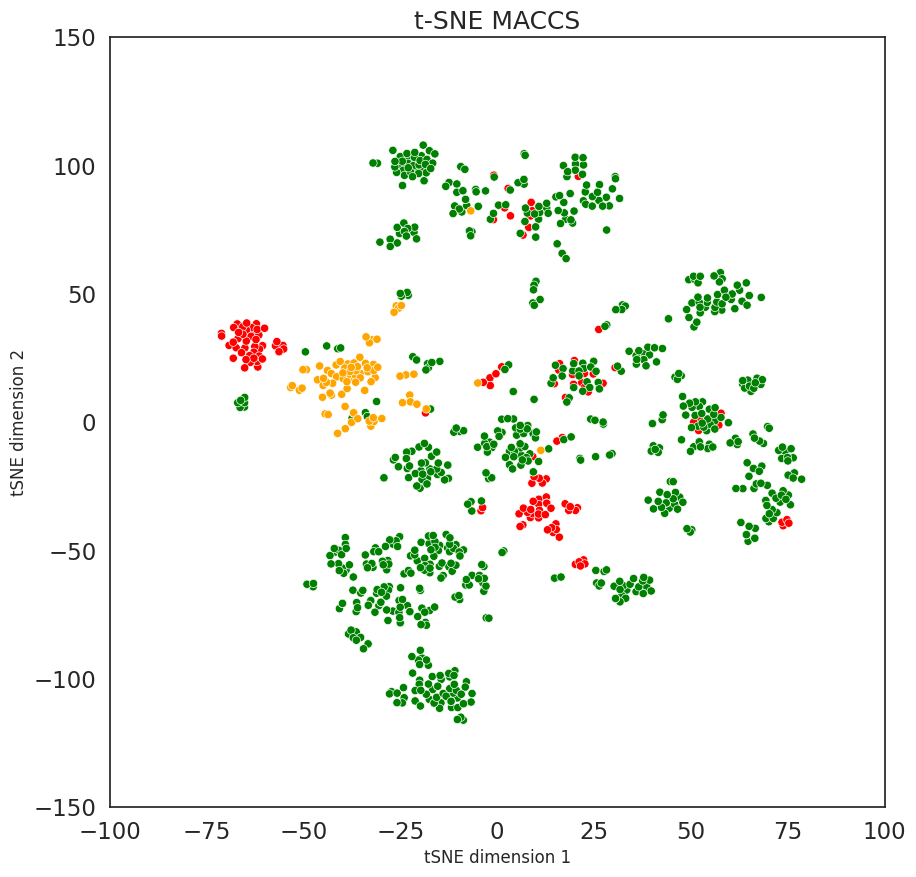

In [ ]:
#tSNE visualization, MACCS Keys, four databases

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(10,10))
plt.title("t-SNE MACCS")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
sns.set(font_scale=1.5)

#Scatterplot with selected palette
sns.scatterplot(
                x = tsne_dataset_30["Component1"],
                y = tsne_dataset_30["Component2"],
                hue = tsne_dataset_30["Data Set"], #Label
                palette=['red','green', 'orange']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 150)
plt.xlim(-100, 100)

#Save plot file
plt.savefig('tsne_MACCS', dpi=300)

<Figure size 640x480 with 0 Axes>

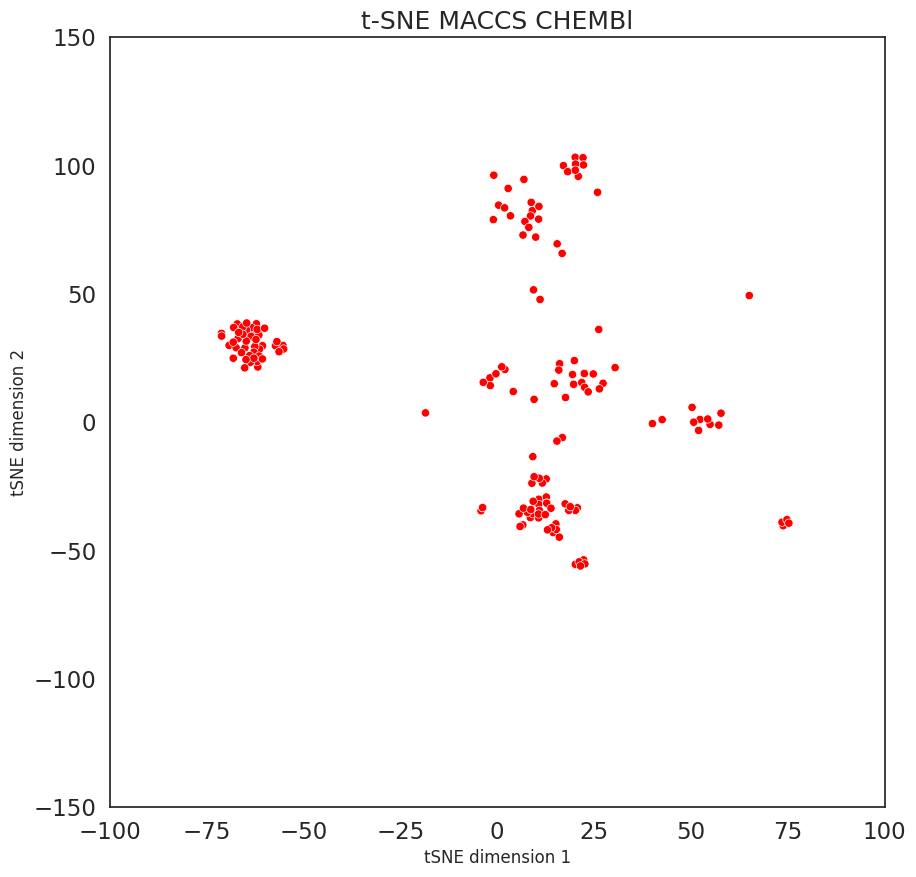

In [ ]:
#tSNE visualization, MACCS Keys, CHEMBl database

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(10,10))
plt.title("t-SNE MACCS CHEMBl")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
sns.set(font_scale=1.5)

#Select one database
tsne_dataset_CHEMBl = tsne_dataset_30[tsne_dataset_30["Data Set"].str.contains("CHEMBl")]


#Scatterplot with corresponding color
sns.scatterplot(
                x = tsne_dataset_CHEMBl["Component1"],
                y = tsne_dataset_CHEMBl["Component2"],
                hue = tsne_dataset_CHEMBl["Data Set"],
                palette=['red']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 150)
plt.xlim(-100, 100)
#Save plot file
plt.savefig('tsne_MACCS_CHEMBl', dpi=300)

<Figure size 640x480 with 0 Axes>

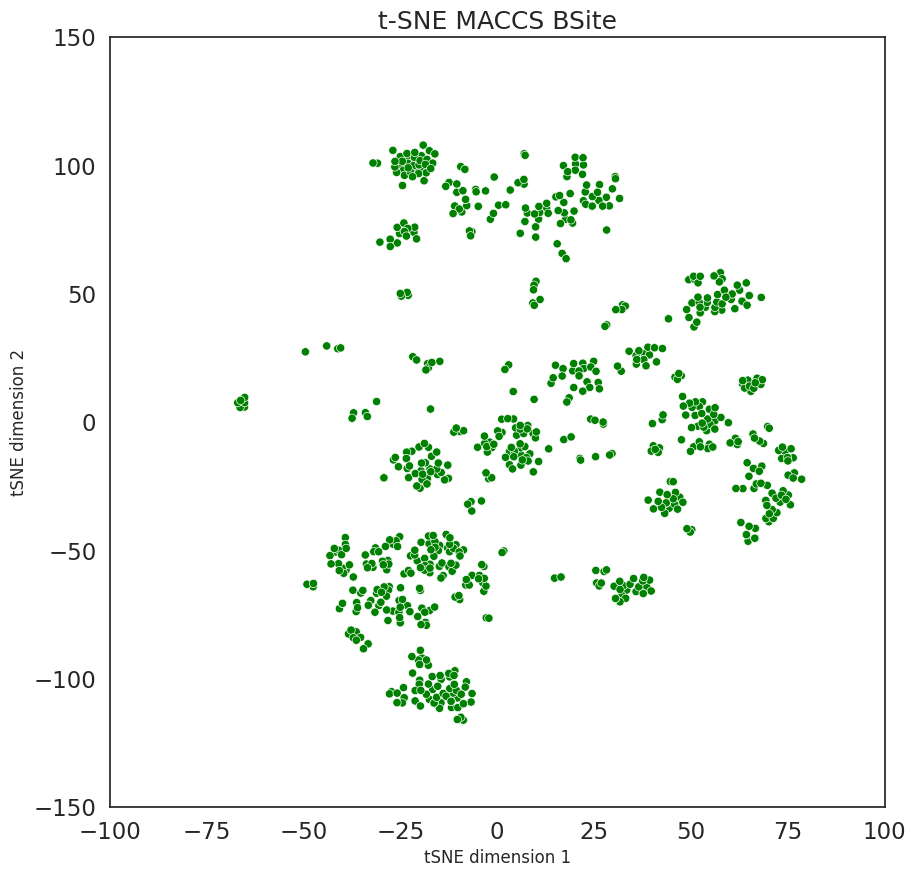

In [ ]:
#tSNE visualization, MACCS Keys, BSite database

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(10,10))
plt.title("t-SNE MACCS BSite")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
sns.set(font_scale=1.5)

#Select one database
tsne_dataset_Bsite = tsne_dataset_30[tsne_dataset_30["Data Set"].str.contains("Bsite")]


#Scatterplot with corresponding color
sns.scatterplot(
                x = tsne_dataset_Bsite["Component1"],
                y = tsne_dataset_Bsite["Component2"],
                hue = tsne_dataset_Bsite["Data Set"],
                palette=['green']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 150)
plt.xlim(-100, 100)

#Save plot file
plt.savefig('tsne_MACCS_Bsite', dpi=300)

# t-SNE Mol

In [ ]:
#tSNE visualization, MACCS Keys, Molecules database

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(10,10))
plt.title("t-SNE MACCS Mol")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
sns.set(font_scale=1.5)

#Select one database
tsne_dataset_Bsite = tsne_dataset_30[tsne_dataset_30["Data Set"].str.contains("Mol")]


#Scatterplot with corresponding color
sns.scatterplot(
                x = tsne_dataset_Bsite["Component1"],
                y = tsne_dataset_Bsite["Component2"],
                hue = tsne_dataset_Bsite["Data Set"],
                palette=['orange']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 150)
plt.xlim(-100, 100)

#Save plot file
plt.savefig('tsne_MACCS_Mol', dpi=300)

# ECFP4

In [ ]:
df_ECFP4=pd.DataFrame([[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=1024).ToBitString()] for x in DATA["SMILES"]])

In [ ]:
#ECFP4 dataframe
df_ECFP4.head(2)

In [ ]:
#Compute tSNE from ECFP4 fingerprint, perplexity: 30, 5000 iterations
data_tsne_ecfp4 = df_ECFP4.copy()
data_tsne_ecfp4 = StandardScaler().fit_transform(data_tsne_ecfp4)
tsne_ecfp4 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000)
tsne_results_ecfp4 = tsne_ecfp4.fit_transform(data_tsne_ecfp4)

In [ ]:
#Concatenate numpy arrays: label and tSNE results ECFP4
label = DATA[["ID", 'SMILES', 'Data Set']]
label = label.to_numpy()
arr_ecfp4 = np.concatenate((label, tsne_results_ecfp4), axis = 1)

In [ ]:
#Create a new dataframe ECFP4
tsne_dataset_ecfp4 = pd.DataFrame(data=arr_ecfp4, columns=["ID", "SMILES", 'Data Set', 'Component1', 'Component2'] )
tsne_dataset_ecfp4

In [ ]:
#tSNE visualization, ECFP4, for databases

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(10,10))
plt.title("t-SNE ECFP4")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
plt.tick_params(axis = 'both', labelsize = 20)
sns.set(font_scale=1.5)


#Scatterplot with selected palette
sns.scatterplot(
                x = tsne_dataset_ecfp4["Component1"],
                y = tsne_dataset_ecfp4["Component2"],
                hue = tsne_dataset_ecfp4["Data Set"], #Labels
                palette=['red', 'green', 'orange']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 100)
plt.xlim(-200, 200)

#Save plot file

plt.savefig('tsne_ECFP4_Total', dpi=300)

In [ ]:
#tSNE visualization, ECFP4, CHEMBl database

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(10,10))
plt.title("t-SNE ECFP4 CHEMBl")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
plt.tick_params(axis = 'both', labelsize = 20)
sns.set(font_scale=1.5)


#Select one database
tsne_dataset_CHEMBl = tsne_dataset_ecfp4[tsne_dataset_ecfp4["Data Set"].str.contains("CHEMBl")]


#Scatterplot with corresponding color
sns.scatterplot(
                x = tsne_dataset_CHEMBl["Component1"],
                y = tsne_dataset_CHEMBl["Component2"],
                hue = tsne_dataset_CHEMBl["Data Set"],
                palette=['red']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 100)
plt.xlim(-200, 200)

#Save plot file
plt.savefig('tsne_ECFP4_CHEMBl', dpi=300)

In [ ]:
#tSNE visualization, ECFP4, Bsite database

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(10,10))
plt.title("t-SNE ECFP4 BSite")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
plt.tick_params(axis = 'both', labelsize = 20)
sns.set(font_scale=1.5)


#Select one database
tsne_dataset_Bsite = tsne_dataset_ecfp4[tsne_dataset_ecfp4["Data Set"].str.contains("Bsite")]


#Scatterplot with corresponding color
sns.scatterplot(
                x = tsne_dataset_Bsite["Component1"],
                y = tsne_dataset_Bsite["Component2"],
                hue = tsne_dataset_Bsite["Data Set"],
                palette=['green']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 100)
plt.xlim(-200, 200)

#Save plot file
plt.savefig('tsne_ECFP4_Bsite', dpi=300)

# t-SNE 4 Mol

In [ ]:
#tSNE visualization, ECFP4, Bsite database

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(10,10))
plt.title("t-SNE ECFP4 Mol")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
plt.tick_params(axis = 'both', labelsize = 20)
sns.set(font_scale=1.5)


#Select one database
tsne_dataset_Bsite = tsne_dataset_ecfp4[tsne_dataset_ecfp4["Data Set"].str.contains("Mol")]


#Scatterplot with corresponding color
sns.scatterplot(
                x = tsne_dataset_Bsite["Component1"],
                y = tsne_dataset_Bsite["Component2"],
                hue = tsne_dataset_Bsite["Data Set"],
                palette=['orange']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 100)
plt.xlim(-200, 200)

#Save plot file
plt.savefig('tsne_ECFP4_Mol', dpi=300)

# Calculo de ECFP6

In [ ]:
df_ECFP6=pd.DataFrame([[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 3, nBits=1024).ToBitString()] for x in DATA["SMILES"]])

In [ ]:
df_ECFP6.head(4)

In [ ]:
#Compute tSNE from ECFP6 fingerprint, perplexity: 30, 5000 iterations
data_tsne_ecfp6 = df_ECFP6.copy()
data_tsne_ecfp6 = StandardScaler().fit_transform(data_tsne_ecfp6)
tsne_ecfp6 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000)
tsne_results_ecfp6 = tsne_ecfp6.fit_transform(data_tsne_ecfp6)

In [ ]:
#Concatenate numpy arrays: label and tSNE results ECFP6
label = DATA[["ID", 'SMILES', 'Data Set']]
label = label.to_numpy()
arr_ecfp6 = np.concatenate((label, tsne_results_ecfp6), axis = 1)

In [ ]:
#Create a new dataframe ECFP6
tsne_dataset_ecfp6 = pd.DataFrame(data=arr_ecfp6, columns=["ID", "SMILES", 'Data Set', 'Component1', 'Component2'] )
tsne_dataset_ecfp6

In [ ]:
#tSNE visualization, ECFP6, for databases

#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(12,12))
plt.title("t-SNE ECFP6")
plt.xlabel("tSNE dimension 1", fontsize=12)
plt.ylabel("tSNE dimension 2", fontsize=12)
plt.tick_params(axis = 'both', labelsize = 20)
sns.set(font_scale=1.5)


#Scatterplot with selected palette
sns.scatterplot(
                x = tsne_dataset_ecfp6["Component1"],
                y = tsne_dataset_ecfp6["Component2"],
                hue = tsne_dataset_ecfp6["Data Set"], #Labels
                palette=['red', 'green','orange']
                )

#Axis
plt.legend().remove()
plt.ylim(-150, 150)
plt.xlim(-200, 200)

#Save plot file

plt.savefig('tsne_ECFP6_Total', dpi=300)